## Digit Recognition

#### Importing dependencies

In [1]:
%matplotlib inline
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import metrics

digits = load_digits()

#### Visualising dataset

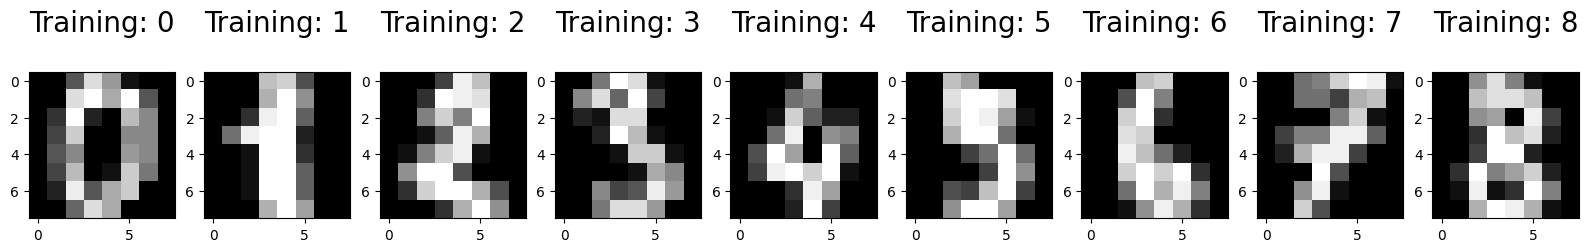

In [2]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:9], digits.target[0:9])):
    plt.subplot(1,9,index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

#### Splitting data into train and test subsets

In [11]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, random_state=0)

#### Creating model

In [12]:
logisticR = LogisticRegression()
logisticR.fit(x_train, y_train)

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

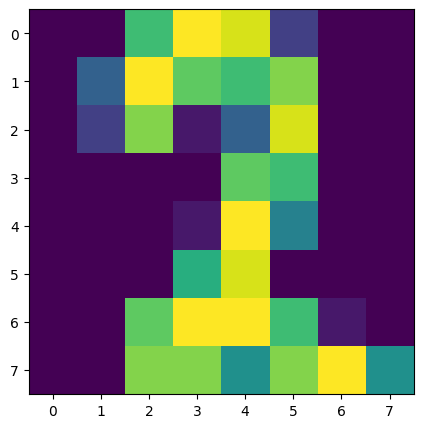

In [13]:
plt.figure(figsize=(5,5))
plt.imshow(x_test[0].reshape(8,8))

In [14]:
y_test[0]

2

In [15]:
logisticR.predict(x_test[6].reshape(1,-1))

array([1])

#### Predict the value of the digit on the test subset

In [16]:
predictions = logisticR.predict(x_test)

#### Calculating and visualising the prediction accuracy

In [17]:
score = logisticR.score(x_test, y_test)
print(score)

0.9543937708565072


Text(0.5, 1.0, 'Accuracy Score: 0.9543937708565072')

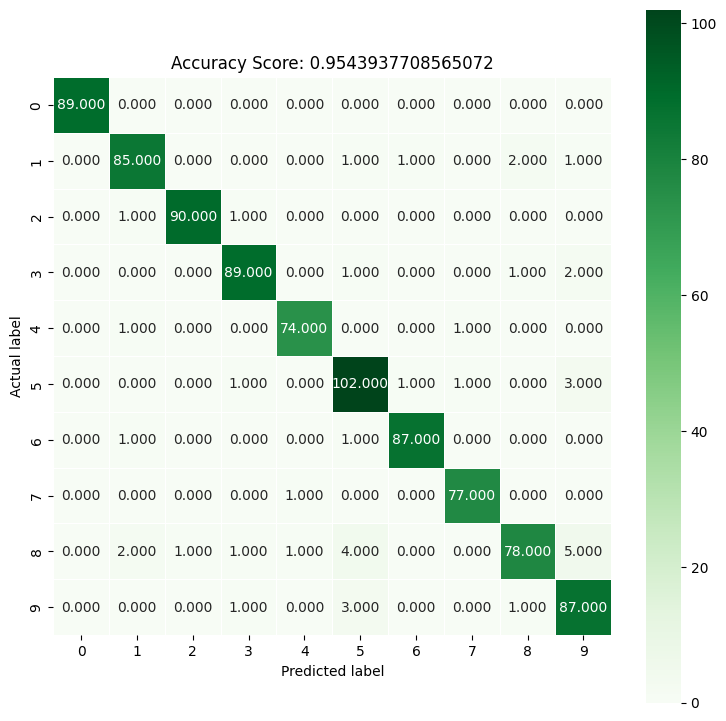

In [18]:
conf_martrix = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize = (9,9))
sns.heatmap(conf_martrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score: {0}'.format(score)
plt.title(title)